<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#思路" data-toc-modified-id="思路-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>思路</a></span><ul class="toc-item"><li><span><a href="#summary-statistic" data-toc-modified-id="summary-statistic-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>summary statistic</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#attribute-selection" data-toc-modified-id="attribute-selection-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>attribute selection</a></span></li><li><span><a href="#Outliers" data-toc-modified-id="Outliers-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Outliers</a></span></li></ul></li><li><span><a href="#Comparison-of-Preprocessing" data-toc-modified-id="Comparison-of-Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Comparison of Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Before" data-toc-modified-id="Before-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Before</a></span></li><li><span><a href="#After" data-toc-modified-id="After-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>After</a></span></li></ul></li><li><span><a href="#for-each-class-EDA" data-toc-modified-id="for-each-class-EDA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>for each class EDA</a></span></li></ul></div>

# 思路
- 预处理 怎么找到词库?

In [2]:
from classification_utils import *
from clustering_utils import *
from eda_utils import *
from nn_utils_keras import *
from feature_engineering_utils import *
from data_utils import *
import warnings 
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [4]:
seeds = 1234

In [49]:
train = pd.read_json('../data/structured_train.json')
test = pd.read_json('../data/structured_test.json')

# l = train['long_string'].dropna().apply(len).sort_values()
# longest_idx = l[l>0].index.tolist()[-30:]
# train = train[~train.global_index.isin(longest_idx)].reset_index(drop=True)
# train['long_string'].sample(10).tolist()


may use cols: 
 ['global_index', 'doc_path', 'label', 'reply', 'reference_one', 'reference_two', 'tag_reply', 'tag_reference_one', 'tag_reference_two', 'Subject', 'From', 'Lines', 'Organization', 'contained_emails', 'long_string', 'text', 'error_message']


In [ ]:
# train, test = load_data(only_stem_voc=True, sample50=False)

In [4]:
# train = train.groupby('label').sample(50, random_state=seeds)
# test = test.groupby('label').sample(50, random_state=seeds)

## summary statistic

In [5]:
a = train.groupby('label').size().to_frame()
a.columns=['count']
a['percentage'] = (a['count']/a['count'].sum())
a = a.reset_index()
cols = ['label', 'count', 'percentage']
a.columns = cols
train_des = a.copy()
a = test.groupby('label').size().to_frame()
a.columns = ['count']
a['percentage'] = (a['count']/a['count'].sum())
a = a.reset_index()
cols = ['label', 'count', 'percentage']
a.columns = cols
test_des = a.copy()
des = train_des.merge(test_des, on='label', suffixes=('_train','_test'))
# des.loc['summation'] = des.sum(axis=0)
# des.loc['summation', 'label'] = 'In total'
# des
des.style.bar(color='#5fba7d', axis=0, align='zero')

,label,count_train,percentage_train,count_test,percentage_test
0,alt.atheism,480,0.043310,319,0.041103
1,comp.graphics,584,0.052693,389,0.050122
2,comp.os.ms-windows.misc,591,0.053325,394,0.050767
3,comp.sys.ibm.pc.hardware,590,0.053235,392,0.050509
4,comp.sys.mac.hardware,578,0.052152,385,0.049607
5,comp.windows.x,593,0.053505,395,0.050896
6,misc.forsale,585,0.052784,390,0.050251
7,rec.autos,593,0.053505,395,0.050896
8,rec.motorcycles,598,0.053957,398,0.051282
9,rec.sport.baseball,597,0.053866,397,0.051153


# EDA

## attribute selection

In [6]:
t = train.isnull().sum().sort_values()
not_used_cols = t[t > train.shape[0]*0.1].index.tolist()
print("not_used_cols: \n", not_used_cols)
t.to_frame().style

not_used_cols: 
 ['Distribution', 'Nntp-Posting-Host', 'NNTP-Posting-Host', 'Reply-To', 'Keywords', 'Article-I.D.', 'X-Newsreader', 'Summary', 'Originator', 'In-Reply-To', 'News-Software', 'Expires', 'In-reply-to', 'To', 'X-Disclaimer', 'Disclaimer', 'X-Mailer', 'X-Useragent', 'X-Xxdate', 'Supersedes', 'X-UserAgent', 'X-XXDate', 'Nf-ID', 'X-News-Reader', 'Nf-From', 'X-Added', 'Original-Sender', 'X-Posted-From', 'X-XXMessage-ID', 'Content-Type', 'X-Xxmessage-Id', 'Cc', 'X-Last-Updated', 'Mime-Version', 'Moderator', 'Content-Transfer-Encoding', 'date', 'X-Gated-By', 'X-To', 'Return-Path', 'X-Received', 'X-Sender', 'Nntp-Posting-User', 'X-Auth-User', 'X-X-From', 'X-Md4-Signature', 'X-Maildoor', 'X-Cc', 'X-NewsSoftware', 'X-AltNet-ID', 'MIME-Version', 'Return-Receipt-To', 'X-Header', 'X-Newssoftware', 'Comments', 'Bcc', 'X-Bytes', 'X-Software', 'X-Copyright', 'Posting-Front-End', 'X-Mail-Reader', 'X-News-Software', 'X-Reader', 'Organisation', 'Apparently-To', 'X-Comment-To', 'Mmdf-Warning'

,0
global_index,0
tag_reply,0
delivered_to,0
reference_two,0
reference_one,0
reply,0
tag_reference_one,0
tag_reference_two,0
doc_path,0
original_idx,0


In [7]:
select_cols = ["global_index", "doc_path", "label", "reply", "reference_one", "reference_two",
               "Subject", "From", "Lines", "Organization", "contained_emails", "long_string", "text", "error_message"]
print("\nmay use cols: \n", select_cols)
train = train[select_cols]
test = test[select_cols]


may use cols: 
 ['global_index', 'doc_path', 'label', 'reply', 'reference_one', 'reference_two', 'Subject', 'From', 'Lines', 'Organization', 'contained_emails', 'long_string', 'text', 'error_message']


In [9]:
train.isnull().sum().sort_values().to_dict()

{'global_index': 0,
 'doc_path': 0,
 'label': 0,
 'reply': 0,
 'reference_one': 0,
 'reference_two': 0,
 'text': 0,
 'Subject': 11,
 'From': 11,
 'contained_emails': 11,
 'long_string': 11,
 'Lines': 48,
 'Organization': 491,
 'error_message': 11083}

In [10]:
# train[["label","global_index", "reply", "reference_one", "reference_two",]].sample(10).style

## Outliers

In [12]:
train['long_string_len'] = train['long_string'].fillna(value='').apply(lambda x: len(x))
train.sort_values(by=['long_string_len']).tail(50)

# a = train['long_string'].fillna(value='').apply(lambda x: len(x))
# b = a
# c = b[b>4]
# check_list = c.index.tolist()[-50:]
# train[train['global_index'].isin(check_list)]['long_string'].tolist()

,global_index,doc_path,label,reply,reference_one,reference_two,Subject,From,Lines,Organization,contained_emails,long_string,text,error_message,long_string_len
9195,9195,../../data/train\talk.politics.guns\53364,talk.politics.guns,Just want to back this up with a personal anec...,Swatikas were also common in American Indian m...,,Re: Nazi memoribilia,cmay@helium.gas.uug.arizona.edu (Christopher C...,34,"University of Arizona - Tucson, Arizona","[ <1993Apr2.232511.10711@raid.dell.com> , mike...",[+============================================...,Subject: Re: Nazi memoribilia\nFrom: cmay@heli...,NaN,5
7767,7767,../../data/train\sci.med\59326,sci.med,what is the likely hood of conception if sperm...,":When I was a school boy, my biology teacher t...",,Re: Pregnency without sex?,scheiber@sage.cc.purdue.edu (Jennifer Scheiber),33,Purdue University Computing Center,"[ <10030@blue.cis.pitt.edu> , kxgst1+@pitt.edu...",[>=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=--=-=-=-=-=...,From: scheiber@sage.cc.purdue.edu (Jennifer Sc...,NaN,5
3038,3038,../../data/train\comp.windows.x\67012,comp.windows.x,For some reason the following code causes my X...,doit = FALSE; doit = FALSE; doit = FALSE;,,Mysterious beeping,defaria@cup.hp.com (Andy DeFaria),121,Hewlett-Packard,"[ defaria@cup.hp.com , defaria@cup.hp.com ]",[/////////////////////////////////////////////...,From: defaria@cup.hp.com (Andy DeFaria)\nSubje...,NaN,6
8306,8306,../../data/train\sci.space\61022,sci.space,Some time ago I sent the following message: Ev...,How many people do you want to share the colon...,,Space Colony Size Preferences Summary,globus@nas.nasa.gov (Al Globus),92,"Applied Research Office, NASA Ames Research Ce...","[ ruca@saber-si.pt , henry@zoo.toronto.edu , ...",[=============================================...,From: globus@nas.nasa.gov (Al Globus)\nSubject...,NaN,6
2161,2161,../../data/train\comp.sys.ibm.pc.hardware\60685,comp.sys.ibm.pc.hardware,"Hi Netters, As promised, here are the summary ...",,,Summary: DoubleDisk Gold v 6.0,christyo@cae.wisc.edu (Buddy Christyono),98,U of Wisconsin-Madison College of Engineering,"[ buddy@optics.ece.wisc.edu , bsteinke@dsd.es...",[---------------------------------------------...,From: christyo@cae.wisc.edu (Buddy Christyono)...,NaN,6
5858,5858,../../data/train\rec.sport.hockey\52619,rec.sport.hockey,"Scoring stats for the Swedish NHL players, Apr...",,,"NHL Swedes: Stats, April 5",etxonss@ufsa.ericsson.se (Staffan Axelsson),141,"Ericsson Telecom, Stockholm, Sweden",[],[=============================================...,From: etxonss@ufsa.ericsson.se (Staffan Axelss...,NaN,6
2065,2065,../../data/train\comp.sys.ibm.pc.hardware\60510,comp.sys.ibm.pc.hardware,Hi! I think VGA-Copy can do what you need. If ...,,,Re: Booting from B drive,rtfuhge@immd8.informatik.uni-erlangen.de (Robe...,36,"University of Erlangen, csd. AI","[ rtfuhge@cip.informatik.uni-erlangen.de , rt...",[+--------------------------------------------...,From: rtfuhge@immd8.informatik.uni-erlangen.de...,NaN,6
5001,5001,../../data/train\rec.motorcycles\104558,rec.motorcycles,You may find it useful. -------------------cut...,,,Re: Cobra Locks,sproulx@bmtlh204.BNR.CA (Stephane Proulx),105,Bell-Northern Research Ltd.,"[ eeharvey@cybaswan.UUCP , <861@cybaswan.UUCP...",[here-----------------------------------------...,From: sproulx@bmtlh204.BNR.CA (Stephane Proulx...,NaN,6
7788,7788,../../data/train\sci.med\59347,sci.med,Lyme Disease Electronic Mail Network LymeNet N...,,,LymeNet Newsletter vol#1 #09,mcg2@Lehigh.EDU (Marc Gabriel),344,None,"[ <jml4s@uva.pcmail.virginia.edu> , <morset@c...",[---------------------------------------------...,From: mcg2@Lehigh.EDU (Marc Gabriel)\nSubject:...,NaN,6
1611,1611,../../data/train\comp.os.ms-windows.misc\9956,comp.os.ms-windows.misc,"Well, I'm amazed at how successful this exerci...",Does anyone know if Borland or Microsoft have ...,,SUMMARY: Borland/Microsoft Database C Libraries,oecjtb@oec4.orbital.dialix.oz.au (John Bongiov...,384,Orbital Engine

In [11]:
# t = train[train["reply"].apply(lambda x: "In article" in x)]
# t.groupby("label").size()

# Comparison of Preprocessing

## Before

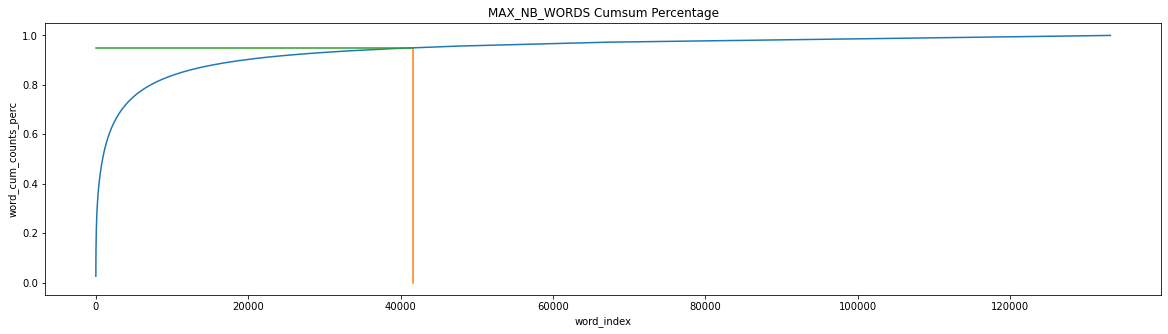

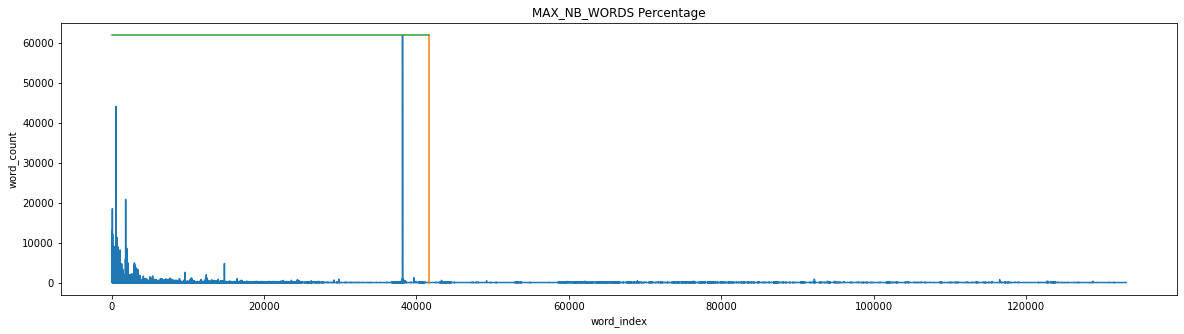

Cut index with 95.0 % of corpus:  41634 

    index          word  count
0   38172           'ax  61917
1     580             i  44145
2    1829           edu  20815
3      87           the  18481
4      44             1  13045
5       0          from  12554
6     113           com  12099
7       5       subject  12016
8      35         lines  11587
9     716            in  11280
10     30  organization  10988
11    531            it   9931
12    662             x   9526
13    303             m   9069
14    848             2   8909
15    602             3   8600
16   1983             '   8542
17   1105            re   8156
18    326             a   7770
19   1834        writes   7663
extreme frequent words:       word  count
38172  'ax  61917


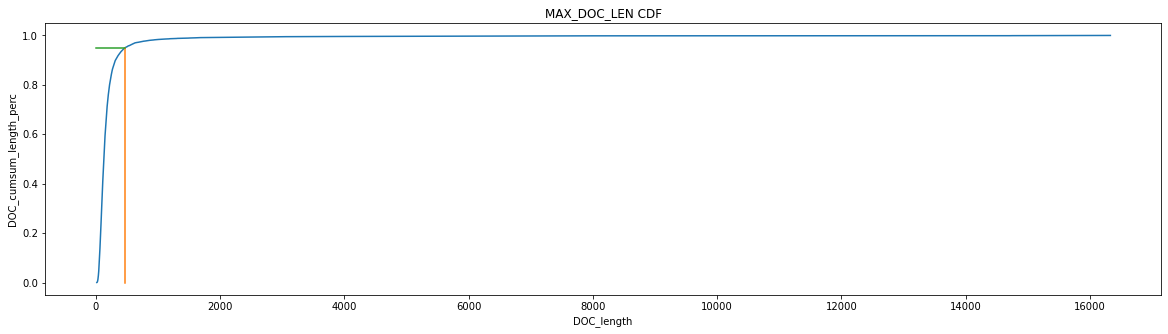

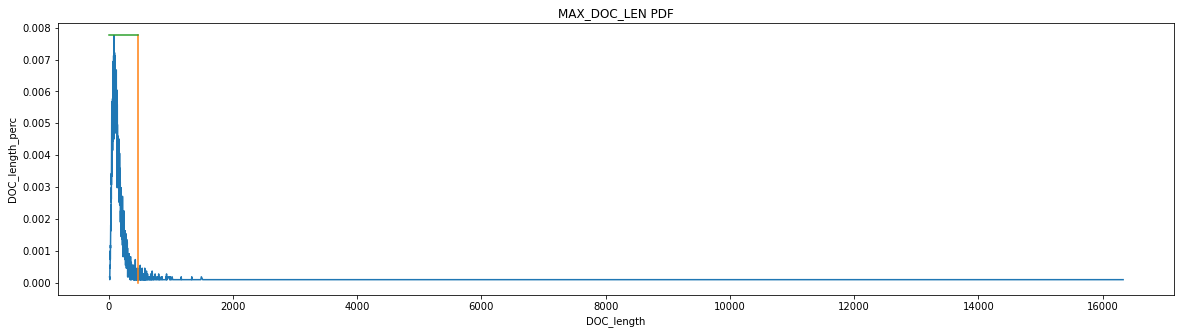

Cut index with 95.0 % of corpus:  469


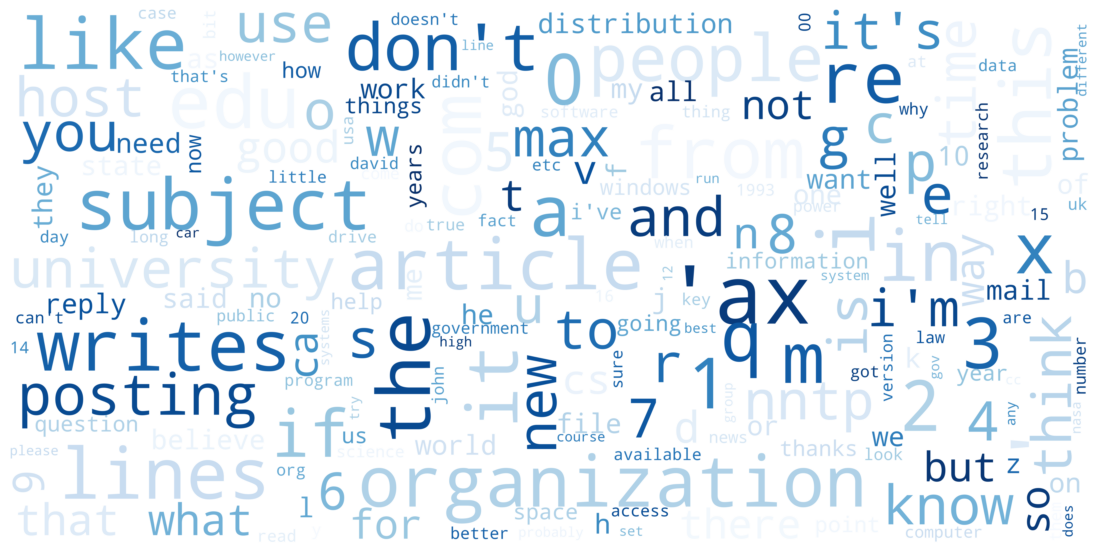

In [65]:
train = pd.read_json('../data/structured_train.json')
test = pd.read_json('../data/structured_test.json')

filtered_corpus=  train['text']
eda_MAX_NB_WORDS(corpus = filtered_corpus, remove_stop=True, ratio = 0.95)
eda_MAX_DOC_LEN(corpus = filtered_corpus, remove_stop=True, ratio=0.95)
eda_WORD_CLOUD(filtered_corpus, color='Blues', remove_stop=True)

## After


may use cols: 
 ['global_index', 'doc_path', 'label', 'reply', 'reference_one', 'reference_two', 'tag_reply', 'tag_reference_one', 'tag_reference_two', 'Subject', 'From', 'Lines', 'Organization', 'contained_emails', 'long_string', 'text', 'error_message']



may use cols: 
 ['global_index', 'doc_path', 'label', 'reply', 'reference_one', 'reference_two', 'tag_reply', 'tag_reference_one', 'tag_reference_two', 'Subject', 'From', 'Lines', 'Organization', 'contained_emails', 'long_string', 'text', 'error_message']


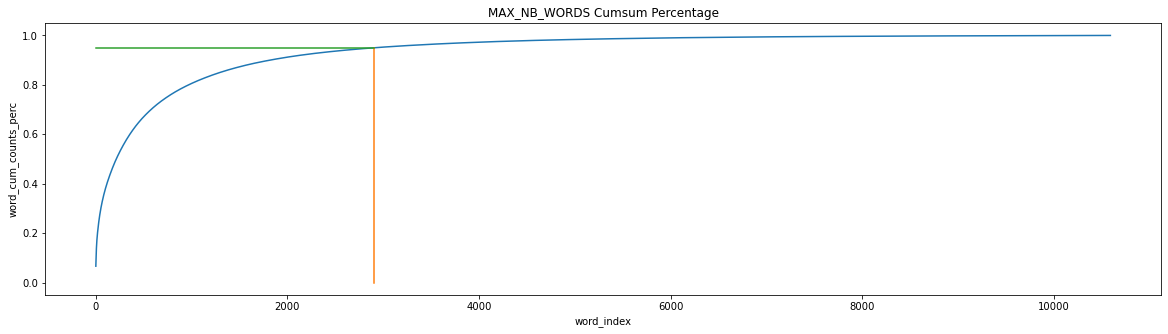

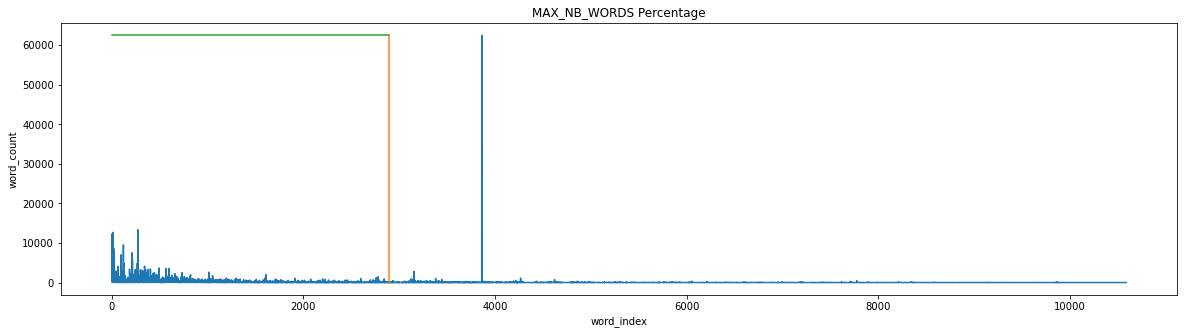

Cut index with 95.0 % of corpus:  2899 

    index     word  count
0    3863       ax  62511
1     273       wa  13350
2      11     line  12669
3       0  subject  12201
4       9    organ  11500
5     122      use   9514
6      21    write   8625
7     212       ha   7538
8      96      ani   7020
9      27     like   6428
10    216     know   5667
11    267    think   4919
12    127       hi   4873
13    128     time   4847
14    343      doe   4146
15     65      new   4075
16    211     work   4047
17    495     good   3690
18    565     want   3582
19    600     year   3571
extreme frequent words:      word  count
3863   ax  62511


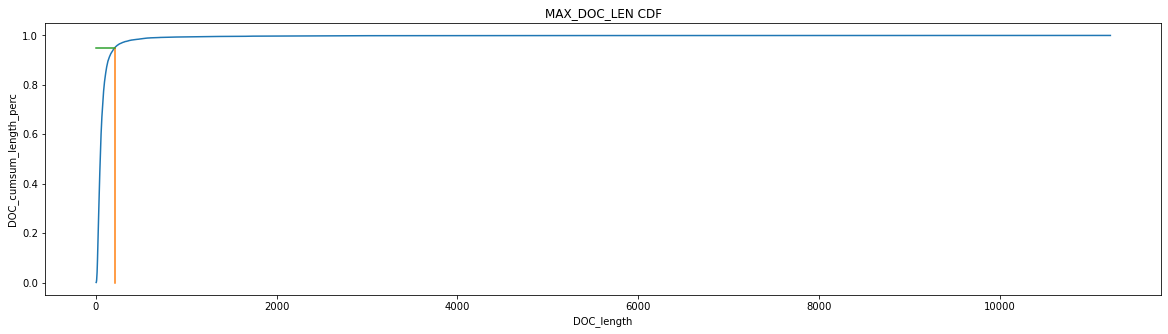

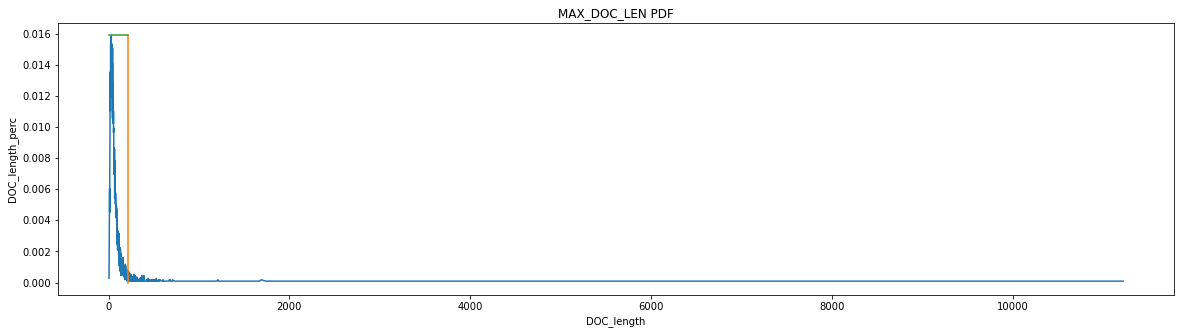

Cut index with 95.0 % of corpus:  210


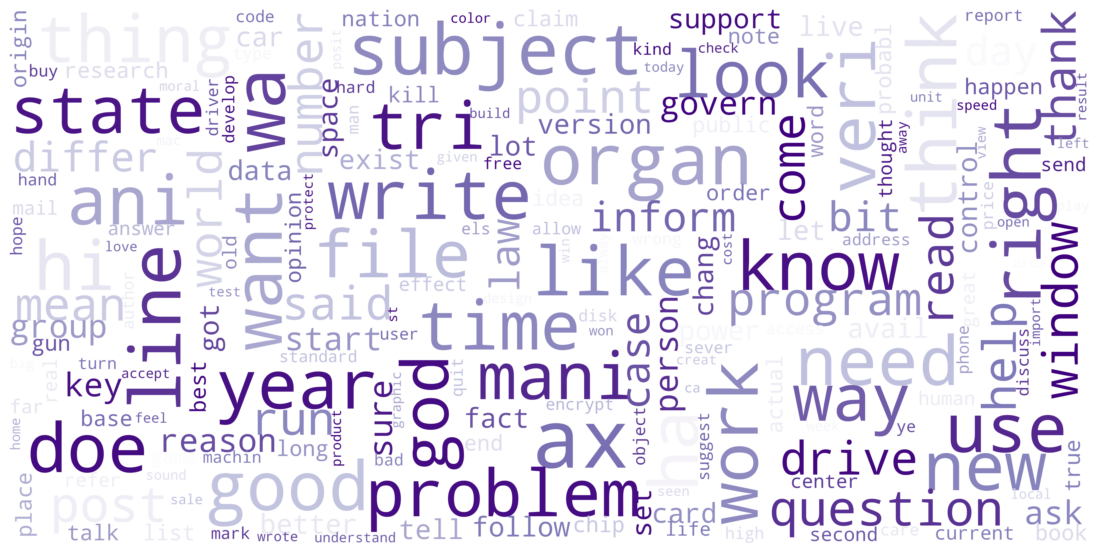

In [64]:
train, test = load_data(only_stem_voc=True, sample50=False)
filtered_corpus=  train['text']
eda_MAX_NB_WORDS(corpus = filtered_corpus, remove_stop=True, ratio = 0.95)
eda_MAX_DOC_LEN(corpus = filtered_corpus, remove_stop=True, ratio=0.95)
eda_WORD_CLOUD(filtered_corpus, color='Purples', remove_stop=True)

# for each class EDA

In [61]:
# label_dict ={}
# for label, table in train.groupby("label"):
#     corpus = table['reply']
#     eda_MAX_NB_WORDS(corpus=corpus, remove_stop=True, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'+'0123456789', ratio=0.95)
#     eda_MAX_DOC_LEN(corpus=corpus, remove_stop=True,  filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'+'0123456789', ratio=0.9)
#     word_freq = eda_WORD_CLOUD(corpus)
#     label_dict[label] = word_freq
# #     break